In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot
# from ipywidgets import interact, widgets
# %matplotlib widget

# Read in cov from MS

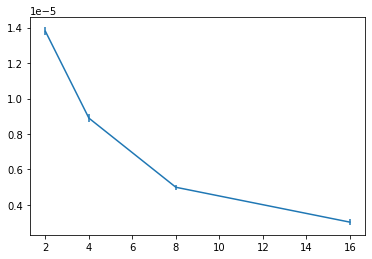

In [2]:
Map2=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/map_squared_our_thetas/map_squared.dat")

Map2_mean=np.mean(Map2, axis=1)
Map2_std=np.std(Map2, axis=1)
Nlos=len(Map2[0])
thetas=[2,4,8,16]
plt.errorbar(thetas, Map2_mean, yerr=Map2_std/np.sqrt(Nlos))

Cov_MS=np.cov(Map2)

Cov_MS_parts=np.array([np.cov(Map2[:,:16]), np.cov(Map2[:,16:32]), np.cov(Map2[:,32:48]), np.cov(Map2[:,48:])])
Cov_MS_std=np.std(Cov_MS_parts, axis=0)

In [5]:
Map2_GRF=np.load("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields_MSlike/map_squared_from_gamma_npix_4096_fieldsize_4.npy")

Map2_mean=np.mean(Map2_GRF, axis=1)
Map2_std=np.std(Map2_GRF, axis=1)
print(Map2_GRF.shape)

Cov_GRF=np.cov(Map2_GRF)
print(Cov_GRF)



(4, 256)
[[ 9.38671178e-14  4.81277179e-14 -1.81063463e-15 -8.28698247e-15]
 [ 4.81277179e-14  1.80183232e-13  1.07305177e-13  1.50163041e-15]
 [-1.81063463e-15  1.07305177e-13  3.00921372e-13  1.37605175e-13]
 [-8.28698247e-15  1.50163041e-15  1.37605175e-13  3.46086794e-13]]


# Fieldsize: 1.87 deg x 1.87 deg

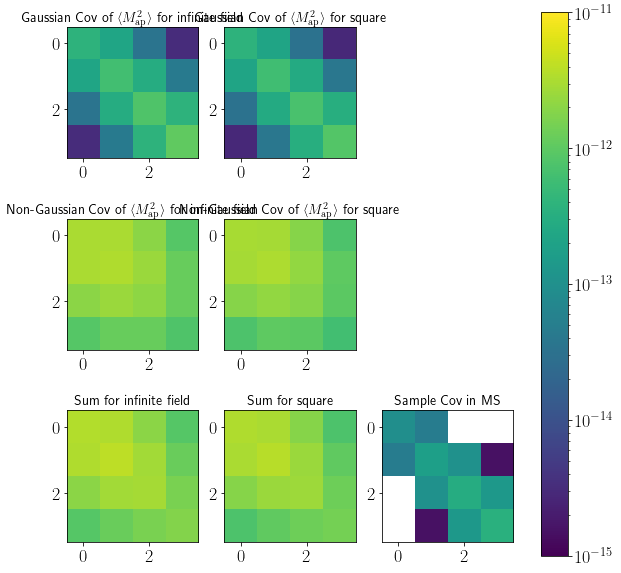

In [4]:
Cov_Gauss_infinity=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_infinite_Gauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
Cov_Gauss_square=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_square_Gauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
Cov_NonGauss_infinity=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_infinite_NonGauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
Cov_NonGauss_square=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_square_NonGauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
initPlot()
fig, ax=plt.subplots(ncols=3, nrows=3, figsize=(10,10))
ax[0][0].imshow(Cov_Gauss_infinity, norm=LogNorm(vmin=1e-15, vmax=1e-11))
ax[0][0].set_title(r"Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for infinite field")
im=ax[0][1].imshow(Cov_Gauss_square, norm=LogNorm(vmin=1e-15, vmax=1e-11))
ax[0][1].set_title(r"Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for square")
ax[0][2].axis('off')

ax[1][0].imshow(Cov_NonGauss_infinity, norm=LogNorm(vmin=1e-15, vmax=1e-11))
ax[1][0].set_title(r"Non-Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for infinite field")
im=ax[1][1].imshow(Cov_NonGauss_square, norm=LogNorm(vmin=1e-15, vmax=1e-11))
ax[1][1].set_title(r"Non-Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for square")
ax[1][2].axis('off')

ax[2][0].imshow(Cov_NonGauss_infinity+Cov_Gauss_infinity, norm=LogNorm(vmin=1e-15, vmax=1e-11))
ax[2][0].set_title(r"Sum for infinite field")
im=ax[2][1].imshow(Cov_NonGauss_square+Cov_Gauss_square, norm=LogNorm(vmin=1e-15, vmax=1e-11))
ax[2][1].set_title(r"Sum for square")
ax[2][2].imshow(Cov_GRF, norm=LogNorm(vmin=1e-15, vmax=1e-11))
ax[2][2].set_title(r"Sample Cov in MS")
fig.colorbar(im, ax=ax, shrink=1)


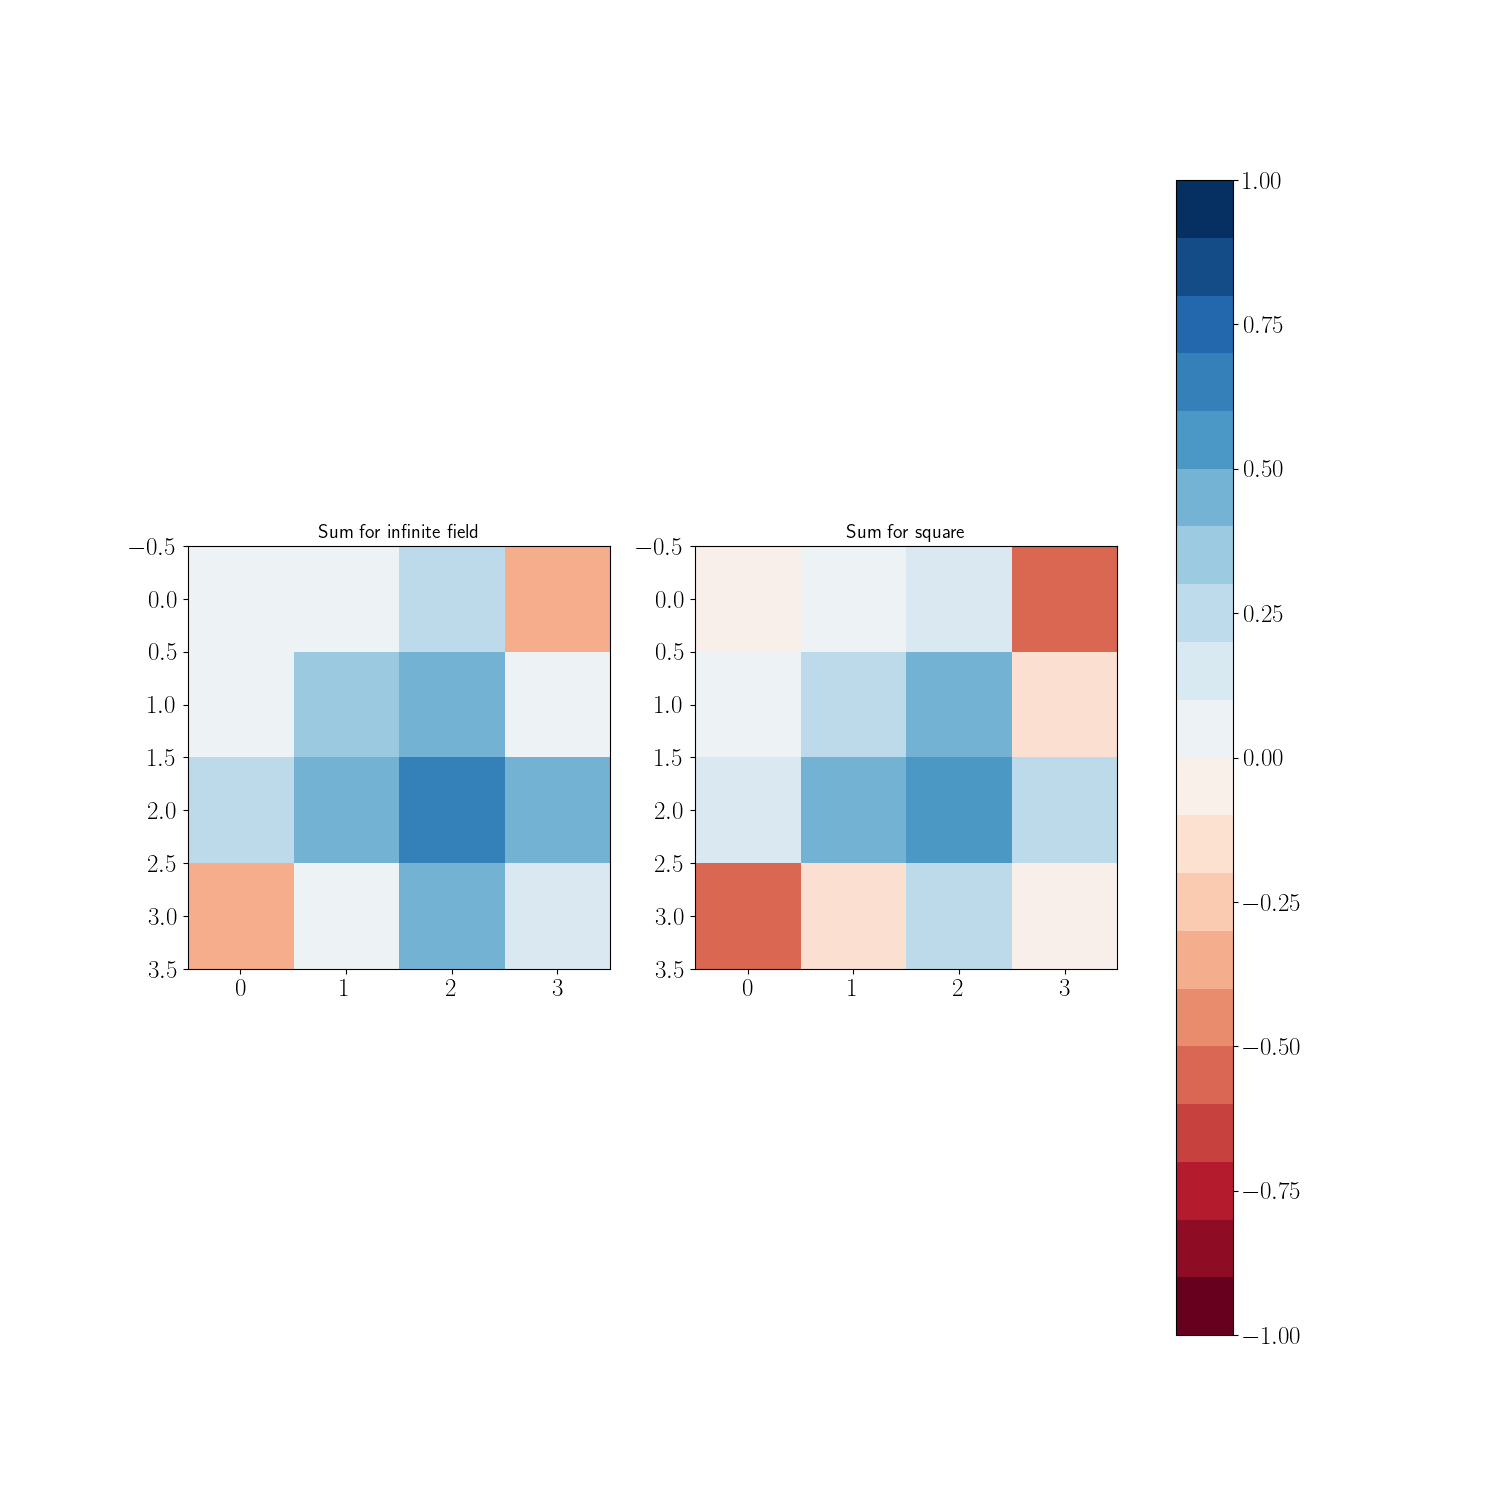

In [73]:
colormap=cm.get_cmap("RdBu", 20)

fig, ax=plt.subplots(ncols=2, nrows=1, figsize=(15,15))


ax[0].imshow(2*(Cov_NonGauss_infinity+Cov_Gauss_infinity-Cov_MS)/(Cov_NonGauss_infinity+Cov_Gauss_infinity+Cov_MS), vmin=-1, vmax=1, cmap=colormap)
ax[0].set_title(r"Sum for infinite field")
im=ax[1].imshow(2*(Cov_NonGauss_square+Cov_Gauss_square-Cov_MS)/(Cov_NonGauss_square+Cov_Gauss_square+Cov_MS), vmin=-1, vmax=1, cmap=colormap)
ax[1].set_title(r"Sum for square")

fig.colorbar(im, ax=ax, shrink=1)


interactive(children=(IntSlider(value=1, description='bin_ix', max=3), Checkbox(value=True, description='plotF…

<function __main__.updateCov(bin_ix, plotFFT=True, showStdFFT=False, plotFFTLOS=False, plotGaussInf=True, plotGaussSquare=True, plotNonGaussInf=True, plotNonGaussSquare=True, plotSumInf=True, plotSumSquare=True)>

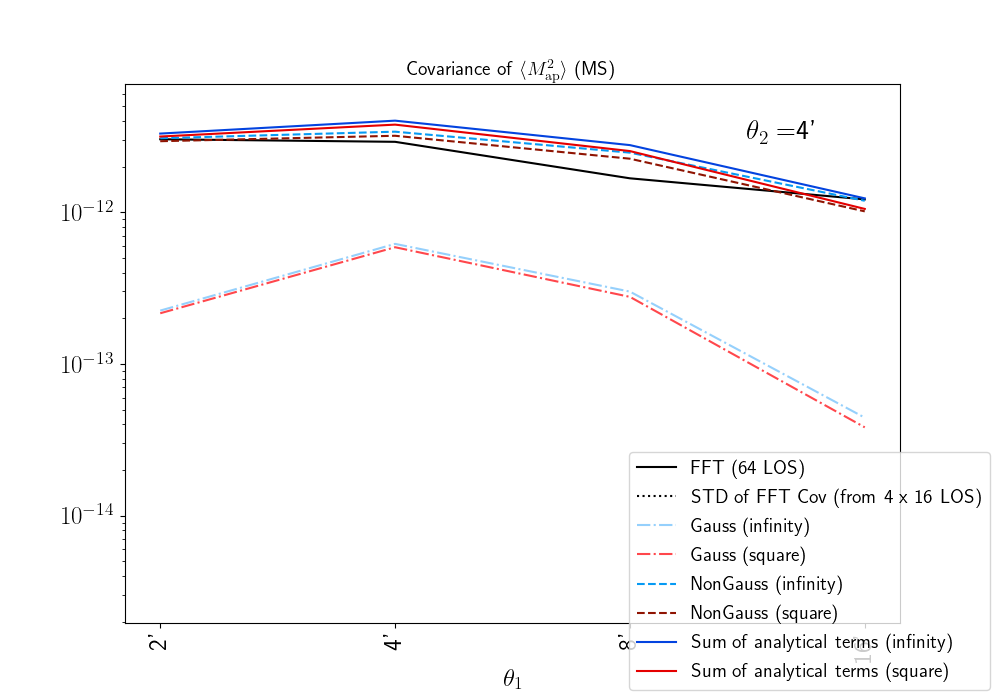

In [150]:
thetas_ind = np.array([2,4, 8, 16])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)


fig, ax=plt.subplots(figsize=(10,7))

ax.set_yscale('log')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)


ax.set_title(r"Covariance of $\langle M_\mathrm{ap}^2\rangle$ (MS)")


ax.set_xlabel(r"$\theta_1$")
thetaText=ax.text(2.5, 3e-12, r"$\theta_2=$"+thetas_labels[0])
line,=ax.plot(Cov_MS[0], label='FFT (64 LOS)', color='k')
line_l, = ax.plot(Cov_MS[0]-Cov_MS_std[0], color='k', ls=':', label='STD of FFT Cov (from 4 x 16 LOS)')
line_u, = ax.plot(Cov_MS[0]+Cov_MS_std[0], color='k', ls=':')

lines=[]
for cov in Cov_MS_parts:
    line2,=ax.plot(cov[0], color='k', ls='-', alpha=0.2)
    lines.append(line2)

GaussInf,=ax.plot(Cov_Gauss_infinity[0], label='Gauss (infinity)', ls='-.', color='xkcd:light blue')
GaussSquare,=ax.plot(Cov_Gauss_square[0], label='Gauss (square)', ls='-.', color='xkcd:light red')
NonGaussInf,=ax.plot(Cov_NonGauss_infinity[0], label='NonGauss (infinity)', ls='--', color="xkcd:azure")
NonGaussSquare,=ax.plot(Cov_NonGauss_square[0], label='NonGauss (square)', ls='--', color='xkcd:brick red')

SumInf,=ax.plot(Cov_Gauss_infinity[0]+Cov_NonGauss_infinity[0], label=r'Sum of analytical terms (infinity)', color='xkcd:blue', ls='-')
SumSquare,=ax.plot(Cov_Gauss_square[0]+Cov_NonGauss_square[0], label=r'Sum of analytical terms (square)', color='xkcd:red', ls='-')

fig.legend(loc="lower right")

Cov_Sum_infinity=Cov_Gauss_infinity+Cov_NonGauss_infinity
Cov_Sum_square=Cov_Gauss_square+Cov_NonGauss_square

def updateCov(bin_ix, plotFFT=True, showStdFFT=False, plotFFTLOS=False, plotGaussInf=True, plotGaussSquare=True, plotNonGaussInf=True, plotNonGaussSquare=True, plotSumInf=True, plotSumSquare=True):
    thetaText.set_text(r"$\theta_2=$"+thetas_labels[bin_ix])

    if(plotFFT):
        line.set_ydata(Cov_MS[bin_ix])
    else:
        line.set_ydata(np.nan*np.ones_like(Cov_MS[bin_ix]))


    if(showStdFFT):
        line_l.set_ydata(Cov_MS[bin_ix]-Cov_MS_std[bin_ix])
        line_u.set_ydata(Cov_MS[bin_ix]+Cov_MS_std[bin_ix])
    else:
        line_l.set_ydata(np.nan*np.ones_like(Cov_MS[bin_ix]-Cov_MS_std[bin_ix]))
        line_u.set_ydata(np.nan*np.ones_like(Cov_MS[bin_ix]+Cov_MS_std[bin_ix]))

    if(plotFFTLOS):
        for i, l in enumerate(lines):
            l.set_ydata(Cov_MS_parts[i][bin_ix])
    else:
        for i, l in enumerate(lines):
            l.set_ydata(np.nan*np.ones_like(Cov_MS_parts[i][bin_ix]))


    if(plotGaussInf):
        GaussInf.set_ydata(Cov_Gauss_infinity[bin_ix])
    else:
        GaussInf.set_ydata(np.nan*np.ones_like(Cov_Gauss_infinity[bin_ix]))

    if(plotNonGaussInf):
        NonGaussInf.set_ydata(Cov_NonGauss_infinity[bin_ix])
    else:
        NonGaussInf.set_ydata(np.nan*np.ones_like(Cov_NonGauss_infinity[bin_ix]))


    if(plotGaussSquare):
        GaussSquare.set_ydata(Cov_Gauss_square[bin_ix])
    else:
        GaussSquare.set_ydata(np.nan*np.ones_like(Cov_Gauss_square[bin_ix]))

    if(plotNonGaussSquare):
        NonGaussSquare.set_ydata(Cov_NonGauss_square[bin_ix])
    else:
        NonGaussSquare.set_ydata(np.nan*np.ones_like(Cov_NonGauss_square[bin_ix]))


    if(plotSumInf):
        SumInf.set_ydata(Cov_Sum_infinity[bin_ix])
    else:
        SumInf.set_ydata(np.nan*np.ones_like(Cov_Sum_infinity[bin_ix]))


    if(plotSumSquare):
        SumSquare.set_ydata(Cov_Sum_square[bin_ix])
    else:
        SumSquare.set_ydata(np.nan*np.ones_like(Cov_Sum_square[bin_ix]))



    fig.canvas.draw_idle()



interact(updateCov, bin_ix=(0, N-1))


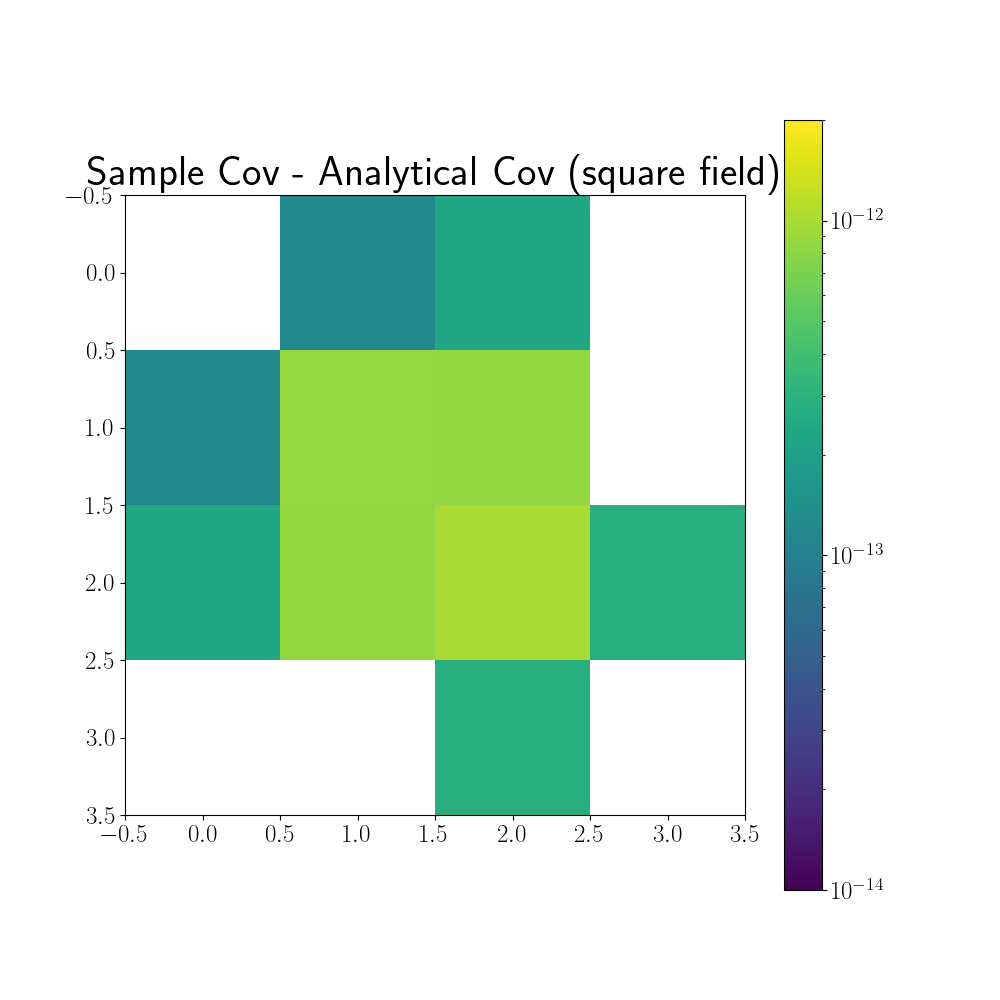

In [109]:



# colormap=cm.get_cmap("RdBu", 16)

# fig, ax=plt.subplots(figsize=(10,10))
# ax.set_title(r"$2\,\frac{C^{\infty}-C}{C^{\infty}+C}$", size=30)
# im=ax.imshow(2*(Cov_Gauss_infinity-Cov_Gauss_square)/(Cov_Gauss_infinity+Cov_Gauss_square), cmap=colormap, vmin=-0.20, vmax=0.20)
# fig.colorbar(im, ax=ax)


fig, ax=plt.subplots(figsize=(10,10))
ax.set_title(r"Sample Cov - Analytical Cov (square field)", size=30)
im=ax.imshow(Cov_Gauss_square+Cov_NonGauss_square-Cov_MS, norm=LogNorm(vmin=1e-14, vmax=2e-12))
fig.colorbar(im, ax=ax)

# print(Cov_MS-Cov_Gauss_square-Cov_NonGauss_square)

# print(Cov_MS-Cov_Gauss_infinity-Cov_NonGauss_infinity)


# Fieldsize: 30 deg x 30 deg

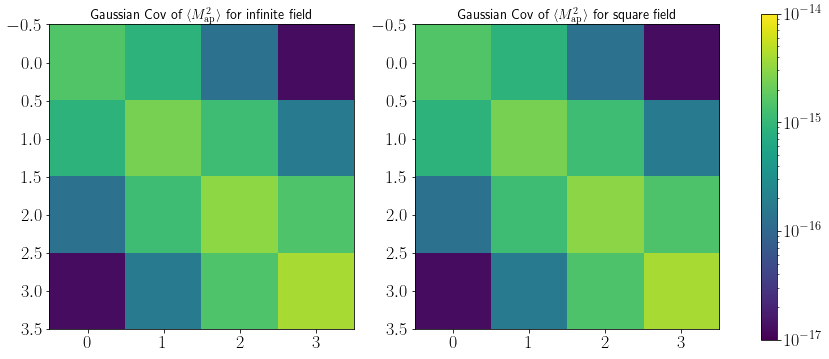

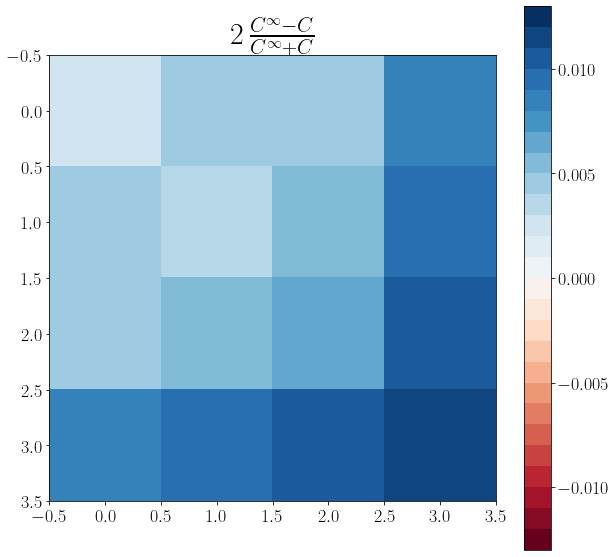

In [90]:
Cov_Gauss_infinity=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_infinite_Gauss_sigma_0.00_n_1048456.68_thetaMax_30.00_gpu.dat")
Cov_Gauss_square=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_square_Gauss_sigma_0.00_n_1048456.68_thetaMax_30.00_gpu.dat")
initPlot()
fig, ax=plt.subplots(ncols=2, figsize=(15,15))
ax[0].imshow(Cov_Gauss_infinity, norm=LogNorm(vmin=1e-17, vmax=1e-14))
ax[0].set_title(r"Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for infinite field")
im=ax[1].imshow(Cov_Gauss_square, norm=LogNorm(vmin=1e-17, vmax=1e-14))
ax[1].set_title(r"Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for square field")
fig.colorbar(im, ax=ax, shrink=0.4)



colormap=cm.get_cmap("RdBu", 26)

fig, ax=plt.subplots(figsize=(10,10))
ax.set_title(r"$2\,\frac{C^{\infty}-C}{C^{\infty}+C}$", size=30)
im=ax.imshow(2*(Cov_Gauss_infinity-Cov_Gauss_square)/(Cov_Gauss_infinity+Cov_Gauss_square), cmap=colormap, vmin=-0.013, vmax=0.013)
fig.colorbar(im, ax=ax)

# Fieldsize: 30 x 30, with KiDSlike shapenoise

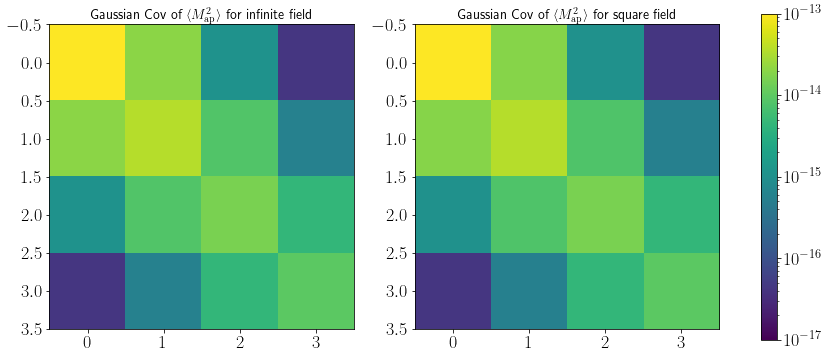

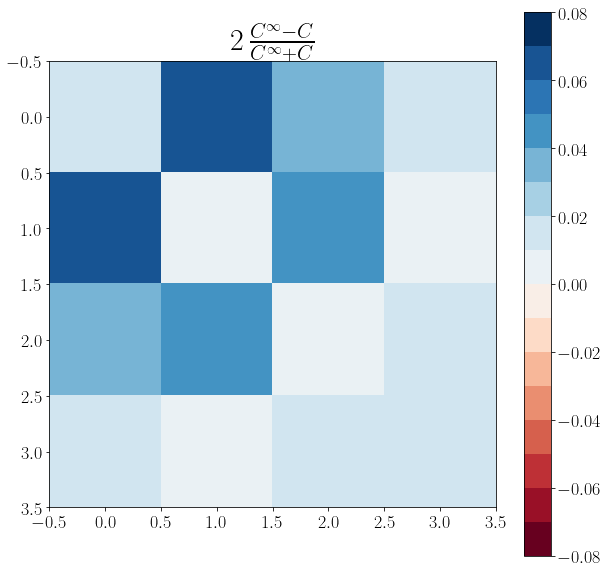

In [99]:
Cov_Gauss_infinity=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_infinite_Gauss_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
Cov_Gauss_square=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/covMap2_square_Gauss_sigma_0.37_n_22209.47_thetaMax_29.32_gpu.dat")
initPlot()
fig, ax=plt.subplots(ncols=2, figsize=(15,15))
ax[0].imshow(Cov_Gauss_infinity, norm=LogNorm(vmin=1e-17, vmax=1e-13))
ax[0].set_title(r"Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for infinite field")
im=ax[1].imshow(Cov_Gauss_square, norm=LogNorm(vmin=1e-17, vmax=1e-13))
ax[1].set_title(r"Gaussian Cov of $\langle M_\mathrm{ap}^2 \rangle$ for square field")
fig.colorbar(im, ax=ax, shrink=0.4)



colormap=cm.get_cmap("RdBu", 16)

fig, ax=plt.subplots(figsize=(10,10))
ax.set_title(r"$2\,\frac{C^{\infty}-C}{C^{\infty}+C}$", size=30)
im=ax.imshow(2*(Cov_Gauss_infinity-Cov_Gauss_square)/(Cov_Gauss_infinity+Cov_Gauss_square), cmap=colormap, vmin=-0.08, vmax=0.08)
fig.colorbar(im, ax=ax)